In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
col_list=list(data.columns)

<BarContainer object of 2 artists>

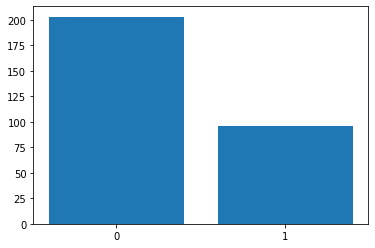

In [5]:
cnt=data.DEATH_EVENT.value_counts()
plt.bar(['0','1'],cnt)

We can see there is imbalance of data. We need to consider this imbalance when using machine learning models. Thus we will use resampling

In [6]:
X=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

## Data Scaling

In [7]:
scale=StandardScaler()
scaled_data=pd.DataFrame(scale.fit_transform(X),columns=col_list[:-1])

We scale the data inorder to avoid bias during modelling

## Finding Correlation

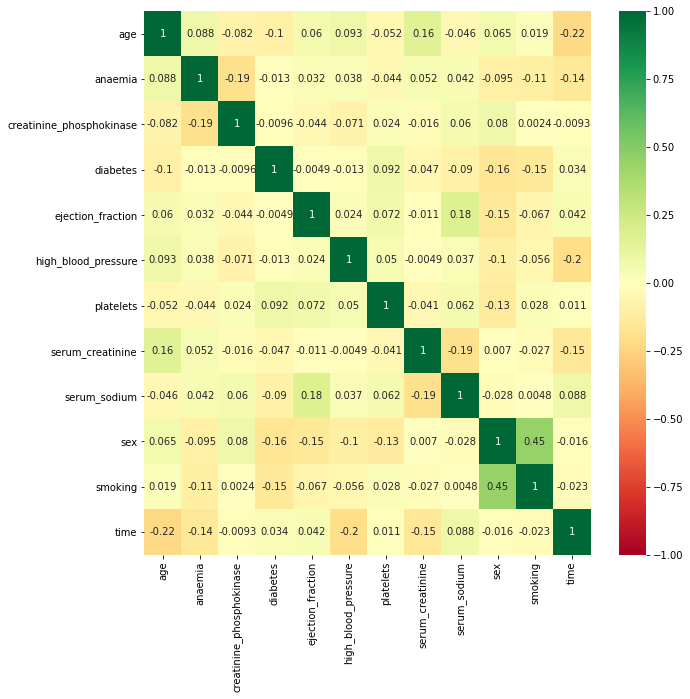

In [8]:
cor=scaled_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cor,vmin=-1,vmax=1,cmap='RdYlGn',annot=True)

From correlation heat map we can see there is very less correlation betwwen features of data

## Splitting data into Training and Testing

In [9]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2)

## Machine Learnig Models

### Logistic Regression

In [10]:
logi=LogisticRegression()
logi.fit(X_train,y_train)
y_pred=logi.predict(X_test)

In [11]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [12]:
confusion_matrix(y_test,y_pred)

array([[38,  4],
       [ 6, 12]])

In [13]:
f1_score(y_test,y_pred)

0.7058823529411765

### Decision Tree

In [14]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.7333333333333333

In [16]:
f1_score(y_test,y_pred)

0.619047619047619

### Random Forest

In [17]:
r_forest=RandomForestClassifier()
r_forest.fit(X_train,y_train)
y_pred=r_forest.predict(X_test)

In [18]:
accuracy_score(y_test,y_pred)

0.8333333333333334

In [19]:
f1_score(y_test,y_pred)

0.7222222222222222

# Resampling Data 

In [20]:
class_0,class_1=data.DEATH_EVENT.value_counts()
df_class_0=data[data['DEATH_EVENT']==0]
df_class_1=data[data['DEATH_EVENT']==1]

In [21]:
df_class_1 =df_class_1.sample(class_0,replace=True)
df_class_1=df_class_1.reset_index(drop=True)
resampled_data=pd.concat([df_class_0,df_class_1],axis=0).reset_index()

<BarContainer object of 2 artists>

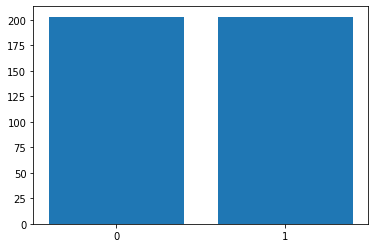

In [22]:
cnt=resampled_data.DEATH_EVENT.value_counts()
plt.bar(['0','1'],cnt)

Here now we have balaced data

In [23]:
X=resampled_data.drop(['DEATH_EVENT','index'],axis=1)
y=resampled_data['DEATH_EVENT']

In [24]:
scale=StandardScaler()
scaled_data=pd.DataFrame(scale.fit_transform(X),columns=col_list[:-1])

In [25]:
X_train,X_test,y_train,y_test=train_test_split(scaled_data,y,test_size=0.2)

In [26]:
logi=LogisticRegression()
logi.fit(X_train,y_train)
y_pred=logi.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred)

0.7560975609756098

In [28]:
confusion_matrix(y_test,y_pred)

array([[30,  6],
       [14, 32]])

In [29]:
f1_score(y_test,y_pred)

0.761904761904762

### Decision Tree

In [30]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
y_pred=decision_tree.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred)

0.9146341463414634

In [32]:
f1_score(y_test,y_pred)

0.9278350515463919

### Random Forest

In [33]:
r_forest=RandomForestClassifier()
r_forest.fit(X_train,y_train)
y_pred=r_forest.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.9512195121951219

In [35]:
f1_score(y_test,y_pred)

0.9583333333333334